3798215.306190736


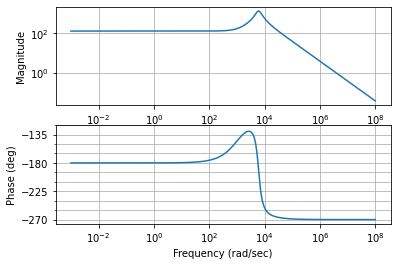

In [34]:
# 0db 주파수 구하기

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

R, L, C = 100, 330e-6, 3.3e-6
D = 0.8
Vin = 5
Vof = Vin / (1 - D)
ILf = Vof / 2

G = co.tf([-ILf * L, -(1 - D) * Vof], [L * C, L / R, (1 - D) ** 2])

mag, phase, omega = co.bode(G, omega=np.logspace(-3, 8, 1000))

M_margin_min = 1e15
w_0db = -1
for M, phi, w in zip(mag, phase, omega):
  if np.abs(M - 1) < M_margin_min:
    M_margin_min = abs(M - 1)
    w_0db = w

print(w_0db)

1.36e-09 7.072e-11 1.61e-10 930000.0 4000.0 2720.0


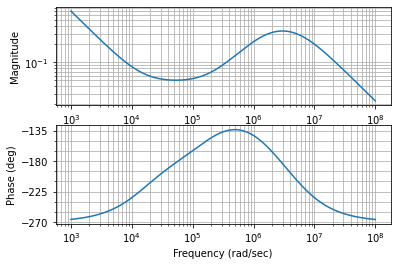

In [53]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

A = 0.08

C1, C2, C3, R1, R2, R3 = \
  17e-9 * A, 0.884e-9 * A, 0.161e-9, \
  930e+3, 50e+3 * A, 34e+3 * A

print(C1, C2, C3, R1, R2, R3)

Gc = -co.tf([C2 * (R1 + R3), 1], [1]) \
  * co.tf([C1 * R2, 1], [1]) \
  / co.tf([R1 * (C1 + C3), 0], [1]) \
  / co.tf([C2 * R3, 1], [1]) \
  / co.tf([C1 * C3 * R2 / (C1 + C3), 1], [1])

mag, phase, omega = co.bode(Gc)


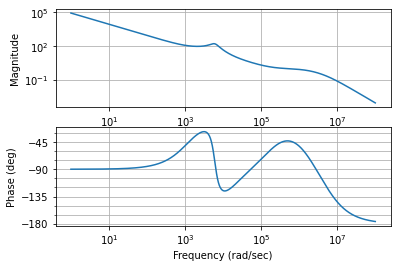

In [54]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

GH = G * Gc

mag, phase, omega = co.bode(GH, omega=np.logspace(0, 8, 1000))